In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [120]:
#Helping Functions
def read_data(path):
    return pd.read_csv(path, index_col=0)


In [127]:
#Train dataset
dataframe=read_data('C:/Users/Umair/Downloads/train.csv')
print(dataframe.shape)
x_train=dataframe[dataframe.columns.drop('SalePrice')]
y_train=dataframe['SalePrice']
print(x_train.shape)
print(y_train.shape)


(1460, 80)
(1460, 79)
(1460,)


In [128]:
#Trian Test Split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

In [129]:
#Label Encoding 
dict1 = defaultdict(LabelEncoder)
encoded_x_train = x_train.astype(str).apply(lambda x_train: dict1[x_train.name].fit_transform(x_train))
encoded_x_test = x_test.astype(str).apply(lambda x_test: dict1[x_test.name].fit_transform(x_test))

In [130]:
#Model Prediction
lg = LinearRegression()
lg.fit(encoded_x_train, y_train)
y_pred = lg.predict(encoded_x_test)
print(y_pred.shape)
print(y_test.shape)

(482,)
(482,)


In [131]:
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test,y_pred))
#R2 Score
print('R2 Score: %.2f' % r2_score(y_test,y_pred))

Mean squared error: 2039621950.31
R2 Score: 0.72


Text(0.5, 1.0, 'First 100 actual and Predicted values')

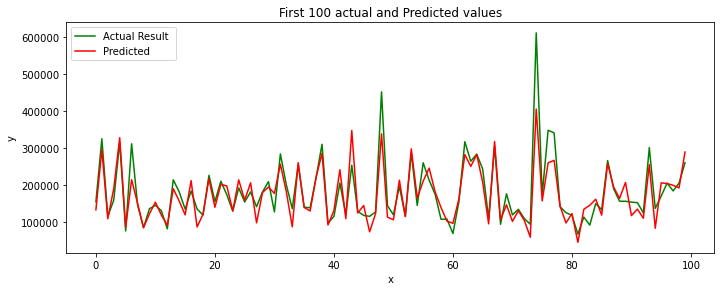

In [132]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.5, 0.8]) # left, bottom, width, height (range 0 to 1)
axes.plot( np.arange(100),y_test[0:100],'g', label="Actual Result ")
axes.plot( np.arange(100),y_pred[0:100],'r', label="Predicted")

axes.legend(loc=2); # upper left corner
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('First 100 actual and Predicted values')